### Hemlata Channe
#### NLP Project I Part I
#### DOMAIN: Digital content management
    • CONTEXT: Classification is probably the most popular task that you would deal with in real life. Text in the form of blogs, posts, articles,etc. is written every second. It is a challenge to predict the information about the writer without knowing about him/her. We are going to create a classi ier that predicts multiple features of the author of a given text. We have designed it as a Multi label classi ication problem.
    • DATA DESCRIPTION: Over 600,000 posts from more than 19 thousand bloggers The Blog Authorship Corpus consists of the collected posts of 19,320 bloggers gathered from blogger.com in August 2004. The corpus incorporates a total of 681,288 posts and over 140 million words - or approximately 35 posts and 7250 words per person. Each blog is presented as a separate ile, the name of which indicates a blogger id# and the blogger’s self-provided gender, age, industry, and astrological sign. (All are labelled for gender and age but for many, industry and/or sign is marked as unknown.) All bloggers included in the corpus fall into one of three age groups:
    • 8240 "10s" blogs (ages 13-17),
    • 8086 "20s" blogs(ages 23-27) and
    • 2994 "30s" blogs (ages 33-47)
    For each age group, there is an equal number of male and female bloggers.
    Each blog in the corpus includes at least 200 occurrences of common English words. All formatting has been stripped with two exceptions. Individual posts within a single blogger are separated by the date of the following post and links within a post are denoted by the label url link. Link to dataset: https://www.kaggle.com/rtatman/blog-authorship-corpus
    • PROJECT OBJECTIVE: The need is to build a NLP classi ier which can use input text parameters to determine the label/s of the blog.
    Steps and tasks:
    1. Import and analyse the data set.
    2. Perform data pre-processing on the data:
    • Data cleansing by removing unwanted characters, spaces, stop words etc. Convert text to lowercase.
    • Target/label merger and transformation
    • Train and test split
    • Vectorisation, etc.
    3. Design, train, tune and test the best text classi ier.
    4. Display and explain detail the classi ication report
    5.Print the true vs predicted labels for any 5 entries from the dataset.
    Hint: The aim here Is to import the text, process it such a way that it can be taken as an inout to the ML/NN classifiers. Be analytical and experimental here in trying new approaches to design the best model

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns
import nltk
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

## Task 1: Import and analyse the data set. Loaded only 30000 rows from the entire dataset.

In [2]:
Data = pd.read_csv("blogtext.csv",nrows = 30000)
Data.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [3]:
Data.columns

Index(['id', 'gender', 'age', 'topic', 'sign', 'date', 'text'], dtype='object')

In [4]:
Data.dtypes

id         int64
gender    object
age        int64
topic     object
sign      object
date      object
text      object
dtype: object

In [5]:
Data.head(2)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...


In [6]:
Data.shape

(30000, 7)

In [7]:
Data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,30000.0,2.289198e+06,1.270772e+06,23191.0,883178.0,2575852.0,3464884.0,4337133.0
age,30000.0,2.517233e+01,8.021620e+00,13.0,17.0,24.0,33.0,48.0


In [8]:
Data.dtypes

id         int64
gender    object
age        int64
topic     object
sign      object
date      object
text      object
dtype: object

<AxesSubplot:xlabel='gender', ylabel='count'>

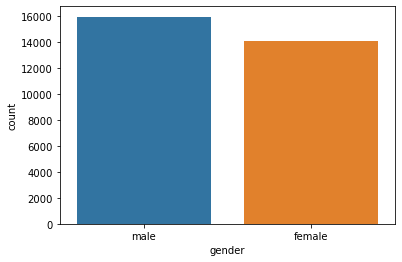

In [9]:
sns.countplot(Data['gender'])

#### There are almost equal number of male and female.

<AxesSubplot:xlabel='age', ylabel='count'>

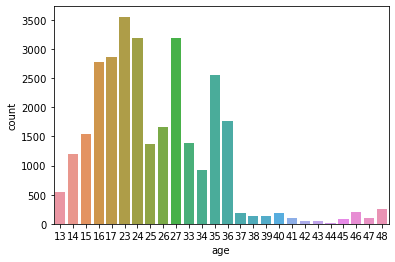

In [10]:
sns.countplot(Data['age'])

##### There are more number of people in the age group 16 to 27.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'Student'),
  Text(1, 0, 'InvestmentBanking'),
  Text(2, 0, 'indUnk'),
  Text(3, 0, 'Non-Profit'),
  Text(4, 0, 'Banking'),
  Text(5, 0, 'Education'),
  Text(6, 0, 'Engineering'),
  Text(7, 0, 'Science'),
  Text(8, 0, 'Communications-Media'),
  Text(9, 0, 'BusinessServices'),
  Text(10, 0, 'Sports-Recreation'),
  Text(11, 0, 'Arts'),
  Text(12, 0, 'Internet'),
  Text(13, 0, 'Museums-Libraries'),
  Text(14, 0, 'Accounting'),
  Text(15, 0, 'Technology'),
  Text(16, 0, 'Law'),
  Text(17, 0, 'Consulting'),
  Text(18, 0, 'Automotive'),
  Text(19, 0, 'Religion'),
  Text(20, 0, 'Fashion'),
  Text(21, 0, 'Publishing'),
  Text(22, 0, 'Marketing'),
  Text(23, 0, 'LawEnforcement-Security'),
  Text(24, 0, 'HumanResources'),
  Text(25, 0, 'Telecommunications'),
  Text(26, 0, 'Military'),
  Text(27, 0, 'Governme

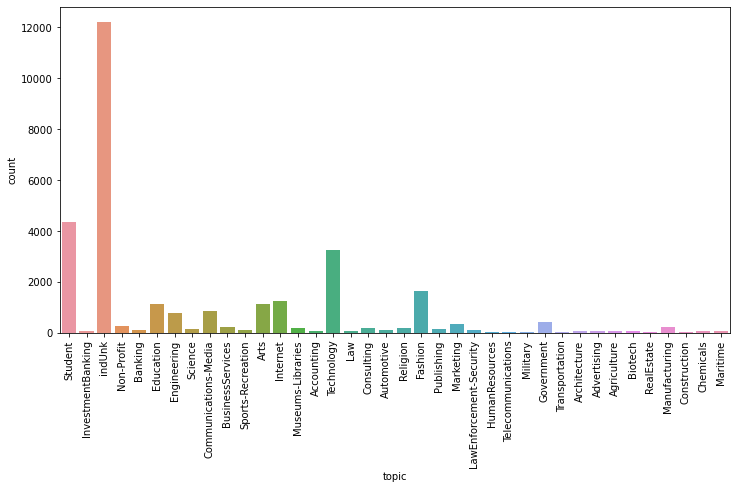

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(Data['topic'])
plt.xticks(rotation=90)

#### More number in the topic of student IndUnk

<AxesSubplot:>

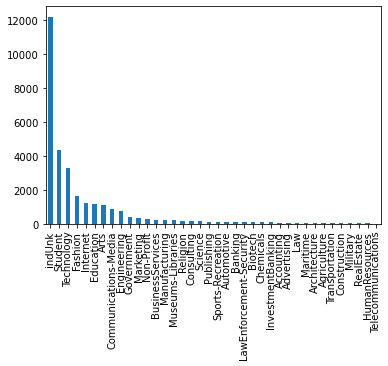

In [12]:
Data['topic'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='gender', ylabel='age'>

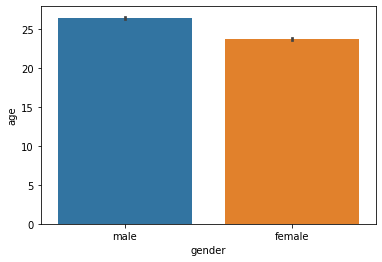

In [13]:
sns.barplot(x = 'gender',
            y = 'age',
            data = Data)

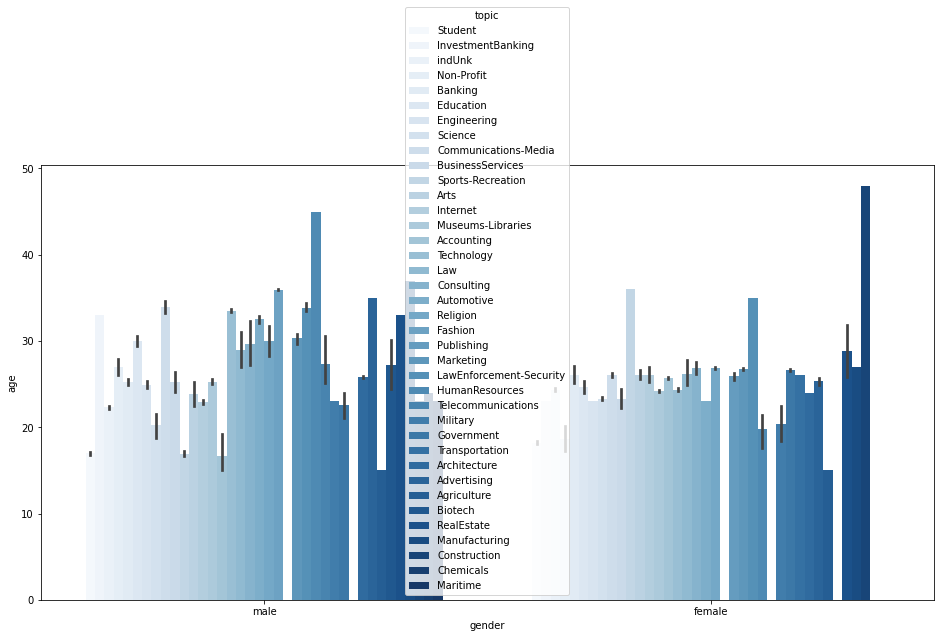

In [14]:
plt.figure(figsize=(16,8))
sns.barplot(x = 'gender',
            y = 'age',
            hue = 'topic',
            data = Data,
            palette = "Blues")
plt.show()

###  Perform data pre-processing on the data:
    • Data cleansing by removing unwanted characters, spaces, stop words etc. 
    Convert text to lowercase.
    • Target/label merger and transformation
    • Train and test split
    • Vectorisation, etc.


In [15]:
Data.drop(labels=['id','date','sign'],axis=1,inplace=True)  #removing unwanted columns

In [16]:
#chosen few samples to speed up processing
Data = Data.sample(12000)

In [17]:
Data.shape

(12000, 4)

In [18]:
labels = Data.copy()
labels['age'] = labels['age'].astype(str)
labels['labels'] = labels[['gender','age','topic']].apply(lambda x:','.join(x), axis = 1) 


In [19]:
labels.drop(labels=['gender','text','age','topic'],axis=1,inplace=True)

In [20]:

labels.head()

,labels
28454,"female,14,indUnk"
20483,"female,27,indUnk"
3418,"male,35,Technology"
15054,"male,23,Communications-Media"
10358,"male,26,indUnk"


In [21]:
labels.reset_index()

,index,labels
0,28454,"female,14,indUnk"
1,20483,"female,27,indUnk"
2,3418,"male,35,Technology"
3,15054,"male,23,Communications-Media"
4,10358,"male,26,indUnk"
...,...,...
11995,6886,"male,36,Fashion"
11996,13469,"female,25,indUnk"
11997,14738,"male,23,Internet"
11998,18793,"male,23,Student"


In [22]:
new_data = Data.copy()
del Data
new_data = new_data['text']
new_data.head()
new_data.reset_index()

,index,text
0,28454,yo yo!!! guess what everyone! i'm s...
1,20483,"today, i am thinking a lot about the pl..."
2,3418,"Trekkies, anyone? The Klingon Langu..."
3,15054,Hey Everyone... Thought I`d write a s...
4,10358,Superman If you were to look clo...
...,...,...
11995,6886,"Duf, Thanks for the report and for ..."
11996,13469,Not sure what to say or where...
11997,14738,Valentine's is a day only to piss...
11998,18793,urlLink Krishnan's comments unfair...


In [23]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
corpus=[]
for i in range(0,len(new_data)):
    review = re.sub('[^a-zA-Z]', ' ',new_data.iloc[i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [24]:
len(corpus)

12000

In [25]:
del new_data

In [26]:
X = corpus
joiny= lambda x: [["".join(re.findall("\w",f)) for f in lst] for lst in [str(s).split(",") for s in x]]
print(labels['labels'].apply(joiny))
y = labels['labels']

28454    [[f], [e], [m], [a], [l], [e], [, ], [1], [4],...
20483    [[f], [e], [m], [a], [l], [e], [, ], [2], [7],...
3418     [[m], [a], [l], [e], [, ], [3], [5], [, ], [T]...
15054    [[m], [a], [l], [e], [, ], [2], [3], [, ], [C]...
10358    [[m], [a], [l], [e], [, ], [2], [6], [, ], [i]...
                               ...                        
6886     [[m], [a], [l], [e], [, ], [3], [6], [, ], [F]...
13469    [[f], [e], [m], [a], [l], [e], [, ], [2], [5],...
14738    [[m], [a], [l], [e], [, ], [2], [3], [, ], [I]...
18793    [[m], [a], [l], [e], [, ], [2], [3], [, ], [S]...
26999    [[m], [a], [l], [e], [, ], [2], [3], [, ], [S]...
Name: labels, Length: 12000, dtype: object


In [27]:
print(y[:5])
print(labels['labels'].head())

28454                female,14,indUnk
20483                female,27,indUnk
3418               male,35,Technology
15054    male,23,Communications-Media
10358                  male,26,indUnk
Name: labels, dtype: object
28454                female,14,indUnk
20483                female,27,indUnk
3418               male,35,Technology
15054    male,23,Communications-Media
10358                  male,26,indUnk
Name: labels, dtype: object


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
vectorizer = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                      ngram_range=(1, 3), stop_words = 'english')


vectorizer.fit(corpus)

CountVectorizer(ngram_range=(1, 3), stop_words='english',
                token_pattern='\\w{1,}')

In [30]:
xtrain_ctv = vectorizer.fit_transform(X_train)

In [31]:
xtest_ctv = vectorizer.transform(X_test)

In [32]:
vectorizer.get_feature_names()[:10]

['aa',
 'aa compar',
 'aa compar tougher',
 'aa damn',
 'aa damn wanna',
 'aa meet',
 'aa meet feel',
 'aa meet ground',
 'aa say',
 'aa say law']

In [33]:
#y = [["".join(re.findall("\w",f)) for f in lst] for lst in [str(s).split(",") for s in y]]

In [34]:
vectorizer_labels = CountVectorizer(min_df = 1,ngram_range = (1,1),stop_words = "english")
labels_vector = vectorizer_labels.fit_transform(y)

In [35]:
labels_vector

<12000x71 sparse matrix of type '<class 'numpy.int64'>'
	with 36622 stored elements in Compressed Sparse Row format>

In [36]:
from sklearn.preprocessing import MultiLabelBinarizer
label_classes=[]
for  key in vectorizer_labels.vocabulary_.keys():
    label_classes.append(key)
print(label_classes)
binarizer = MultiLabelBinarizer(classes = label_classes)


['female', '14', 'indunk', '27', 'male', '35', 'technology', '23', 'communications', 'media', '26', '17', 'student', '33', 'internet', '13', '24', 'museums', 'libraries', '16', 'engineering', 'science', 'arts', '34', '36', 'fashion', 'architecture', 'automotive', 'education', '41', '25', 'businessservices', '47', 'accounting', 'marketing', 'religion', '15', '45', '37', 'manufacturing', '38', 'government', 'non', 'profit', 'agriculture', 'biotech', '40', 'investmentbanking', '48', '46', '43', 'realestate', 'chemicals', 'humanresources', 'sports', 'recreation', 'maritime', '42', '39', 'consulting', 'lawenforcement', 'security', 'publishing', 'transportation', 'banking', 'advertising', 'law', 'military', '44', 'telecommunications', 'construction']


In [37]:

#labels_trans = binarizer.fit(labels) 
Y_train = [["".join(re.findall("\w",f)) for f in lst] for lst in [str(s).split(",") for s in y_train]]

Y_test = [["".join(re.findall("\w",f)) for f in lst] for lst in [str(s).split(",") for s in y_test]]


In [38]:
Y_train_bin = binarizer.fit_transform(Y_train)

Y_test_bin = binarizer.transform(Y_test) 

In [39]:
Y_train_bin.shape

(8400, 71)

In [40]:
Y_train_bin[:5]

array([[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [1, 0, 0,

In [41]:
binarizer.inverse_transform(Y_train_bin)[:5]

[('14', 'male'),
 ('male', '35'),
 ('male', '17'),
 ('male', '16'),
 ('female', '23')]

In [42]:
Y_test_bin.shape

(3600, 71)

In [43]:
Y_train_bin.shape

(8400, 71)

In [44]:
print(xtest_ctv.shape[0])

3600


In [45]:
print(xtrain_ctv.shape[0])

8400


In [46]:
Y_test_bin[:5]

array([[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [1, 0, 0,

In [47]:
from sklearn.multiclass import OneVsRestClassifier
lr_clf = LogisticRegression(solver = 'lbfgs',max_iter = 500) 
lr_clf = OneVsRestClassifier(lr_clf)
lr_clf.fit(xtrain_ctv,Y_train_bin)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=500))

In [48]:
from sklearn.metrics import accuracy_score,f1_score,precision_score
print("Training Accuracy logistic regression :",lr_clf.score(xtrain_ctv,Y_train_bin))

Training Accuracy logistic regression : 0.9557142857142857


In [49]:
y_pred = lr_clf.predict(xtest_ctv)
print("Test Accuracy Logistic regression :" + str(accuracy_score(Y_test_bin,y_pred)))

Test Accuracy Logistic regression :0.10888888888888888


In [50]:
print(binarizer.inverse_transform(Y_test_bin)[:5])
binarizer.inverse_transform(y_pred)[0:5]

[('female', '14'), ('female', '34'), ('male', '35'), ('female', '46'), ('female', '27')]


[('female',), ('male',), ('male',), ('male',), ('male',)]

In [51]:
from sklearn.metrics import average_precision_score,recall_score
print('Test Accuracy score: ', accuracy_score(Y_test_bin, y_pred))
print('F1 score: Micro', f1_score(Y_test_bin, y_pred,average='micro'))
print('Average precision score: Micro', average_precision_score(Y_test_bin, y_pred, average='micro'))
print('Average recall score: Micro', recall_score(Y_test_bin, y_pred,average='micro'))

Test Accuracy score:  0.10888888888888888
F1 score: Micro 0.5316941320080216
Average precision score: Micro 0.31869203580714917
Average recall score: Micro 0.42347222222222225


In [52]:
import random 

def print_predicted(y_predicted, y_test , n = 5):
    j = []
    for i in range(n):
        j.append(random.randint(0, len(y_test)))
    print(j)
                 
    for k in j:
        print(binarizer.inverse_transform(y_predicted)[k])
        print(binarizer.inverse_transform(y_test)[k])

In [53]:
print_predicted(y_predicted=y_pred,y_test=Y_test_bin, n= 5)

[2525, 2835, 3363, 329, 2986]
('male',)
('male', '16')
('male',)
('female', '17')
('male',)
('27', 'male')
('male',)
('male', '35')
('female', '14', '17')
('male', '16')


In [54]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(max_depth=10,random_state=0)

In [55]:
model.fit(xtrain_ctv,Y_train_bin)
rf_pred = model.predict(xtest_ctv)

In [56]:
binarizer.inverse_transform(rf_pred)[0:5]

[('male',), ('male',), ('male',), ('male',), ('male',)]

In [57]:
Y_test_bin[0:5]

array([[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [1, 0, 0,

In [58]:
print("Test Accuracy:" + str(accuracy_score(Y_test_bin,rf_pred)))
print('F1 score: Micro', f1_score(Y_test_bin, rf_pred,average='micro'))
print('Average precision score: Micro', average_precision_score(Y_test_bin, rf_pred, average='micro'))
print('Average recall score: Micro', recall_score(Y_test_bin, rf_pred,average='micro'))

Test Accuracy:0.0
F1 score: Micro 0.3842592592592592
Average precision score: Micro 0.18616293633715872
Average recall score: Micro 0.2881944444444444


In [59]:
#!pip install scikit-multilearn

In [60]:
vectorizer_labels_tfd = TfidfVectorizer(min_df = 3,ngram_range = (1,1),stop_words = "english")
labels_vector_tfd = vectorizer_labels.fit_transform(y)

In [61]:
binarizer_tfd = MultiLabelBinarizer(classes = label_classes)


In [62]:
Y_train_bintfd = binarizer_tfd.fit_transform(Y_train)

Y_test_bintfd = binarizer_tfd.transform(Y_test) 

In [63]:
tfv = TfidfVectorizer(min_df=3,  max_features=None,strip_accents='unicode', \
                      analyzer='word',token_pattern=r'\w{1,}',\
                      ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,\
                      stop_words = 'english')


# # Fitting TF-IDF to both training and test sets (semi-supervised learning)
tfv.fit(list(X_train) + list(X_test))
xtrain_tfv =  tfv.transform(X_train) 
xtest_tfv = tfv.transform(X_test)
xtrain_tfv

<8400x66200 sparse matrix of type '<class 'numpy.float64'>'
	with 721760 stored elements in Compressed Sparse Row format>

In [64]:
from sklearn.linear_model import PassiveAggressiveClassifier

linear_clf_tfv = PassiveAggressiveClassifier(max_iter=50)
linear_clf_tfv = OneVsRestClassifier(linear_clf_tfv)

In [65]:
print(xtrain_tfv.shape[0],Y_train_bintfd.shape[0])

8400 8400


In [66]:
linear_clf_tfv.fit(xtrain_tfv, Y_train_bintfd)
linear_clf_pred = linear_clf_tfv.predict(xtest_tfv)
score = metrics.accuracy_score(Y_test_bintfd, linear_clf_pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.197


In [67]:
print("Test Accuracy:" + str(accuracy_score(Y_test_bintfd,linear_clf_pred)))
print('F1 score: Micro', f1_score(Y_test_bintfd, linear_clf_pred,average='micro'))
print('Average precision score: Micro', average_precision_score(Y_test_bintfd, linear_clf_pred, average='micro'))
print('Average recall score: Micro', recall_score(Y_test_bintfd, linear_clf_pred,average='micro'))

Test Accuracy:0.19666666666666666
F1 score: Micro 0.5720321081537811
Average precision score: Micro 0.35827413088141696
Average recall score: Micro 0.4701388888888889


In [68]:
lr_clf_tfv = LogisticRegression(solver = 'sag',max_iter = 1000,multi_class='auto') 
lr_clf_tfv = OneVsRestClassifier(lr_clf_tfv)
lr_clf_tfv.fit(xtrain_tfv,Y_train_bin)
lr_clf_tfv_pred=lr_clf_tfv.predict(xtest_tfv)

In [69]:
print("Test Accuracy:" + str(accuracy_score(Y_test_bintfd,lr_clf_tfv_pred)))
print('F1 score: Micro', f1_score(Y_test_bintfd, lr_clf_tfv_pred,average='micro'))
print('Average precision score: Micro', average_precision_score(Y_test_bintfd, lr_clf_tfv_pred, average='micro'))
print('Average recall score: Micro', recall_score(Y_test_bintfd, lr_clf_tfv_pred,average='micro'))

Test Accuracy:0.024444444444444446
F1 score: Micro 0.5015144561725562
Average precision score: Micro 0.2980331370269429
Average recall score: Micro 0.3794444444444444


In [70]:
print(binarizer.inverse_transform(lr_clf_tfv_pred)[0:5])

[('female',), ('male',), ('female',), ('male',), ('male',)]


In [71]:
print(binarizer.inverse_transform(Y_test_bintfd)[:5])

[('female', '14'), ('female', '34'), ('male', '35'), ('female', '46'), ('female', '27')]


In [72]:
from sklearn.naive_bayes import MultinomialNB

mnb_clf = MultinomialNB()
mnb_clf = OneVsRestClassifier(mnb_clf)
mnb_clf.fit(xtrain_tfv, Y_train_bin)
mnb_ypred = mnb_clf.predict(xtest_tfv)


In [73]:
print("Test Accuracy:" + str(accuracy_score(Y_test_bin,mnb_ypred)))
print('F1 score: Micro', f1_score(Y_test_bin, mnb_ypred,average='micro'))
print('Average precision score: Micro', average_precision_score(Y_test_bin, mnb_ypred, average='micro'))
print('Average recall score: Micro', recall_score(Y_test_bin, mnb_ypred,average='micro'))

Test Accuracy:0.015
F1 score: Micro 0.49516441005802714
Average precision score: Micro 0.29206330132834196
Average recall score: Micro 0.37333333333333335


In [74]:
from sklearn.svm import LinearSVC
svc_clf = LinearSVC()
svc_clf = OneVsRestClassifier(svc_clf)
svc_clf.fit(xtrain_tfv, Y_train_bin)
svc_pred = svc_clf.predict(xtest_tfv)

In [75]:
print("Test Accuracy:" + str(accuracy_score(Y_test_bintfd,svc_pred)))
print('F1 score: Micro', f1_score(Y_test_bintfd, svc_pred,average='micro'))
print('Average precision score: Micro', average_precision_score(Y_test_bin, svc_pred, average='micro'))
print('Average recall score: Micro', recall_score(Y_test_bin, svc_pred,average='micro'))

Test Accuracy:0.1461111111111111
F1 score: Micro 0.5624890446976336
Average precision score: Micro 0.35533715601871985
Average recall score: Micro 0.44569444444444445


In [77]:
svc_clf_ctv = LinearSVC()
svc_clf_ctv = OneVsRestClassifier(svc_clf_ctv)
svc_clf_ctv.fit(xtrain_ctv, Y_train_bin)
svc_pred_ctv = svc_clf_ctv.predict(xtest_ctv)


In [78]:
print("Test Accuracy:" + str(accuracy_score(Y_test_bintfd,svc_pred_ctv)))
print('F1 score: Micro', f1_score(Y_test_bintfd, svc_pred_ctv,average='micro'))
print('Average precision score: Micro', average_precision_score(Y_test_bin, svc_pred_ctv, average='micro'))
print('Average recall score: Micro', recall_score(Y_test_bin, svc_pred_ctv,average='micro'))

Test Accuracy:0.12666666666666668
F1 score: Micro 0.5023908192540645
Average precision score: Micro 0.2738543652842008
Average recall score: Micro 0.43777777777777777


Implemented different multilabel classifiers: 
   
    Trained and tested Logistic regression,SVC, random forest classifier, GaussianNB with Binaryrelevance, GaussianNB with labelpowerset along with features transformed using countvectorizer.
    And PassiveAggressiveClassifier and Logiscticregression are implemented with tfid vectorizer.
    SVC and PassiveAggressiveClassifier along with tfidvectorizer shows better test accuracy than other classifiers.
    Testing accuracy of Logistic regression is less than to that of SVC with tfidvectorizer also.
    TFidvectorizer provides better results as it also provides importance of the words.
    
    With Logistic regression, MultinomialNB, SVC and PassiveAggressiveClassifier tfidvectorizer is used.
    Evaluation Metrics precision score around 28 to 30%, F1-score aroud 56%, recall_score are 37% to 44%.